In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
from keras._tf_keras.keras.models import Sequential,load_model
from keras._tf_keras.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras._tf_keras.keras.preprocessing import image
from keras import backend as K

In [27]:
img_height, img_width = 28, 28
batch_size = 32

df = pd.read_csv('pics_labels.csv')

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='Dataset/',
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='Dataset/',
    x_col="filename",
    y_col="label",
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes (letters): {num_classes}")

Found 7867 validated image filenames belonging to 63 classes.
Found 1966 validated image filenames belonging to 63 classes.
Number of classes (letters): 63


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 12 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 12 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


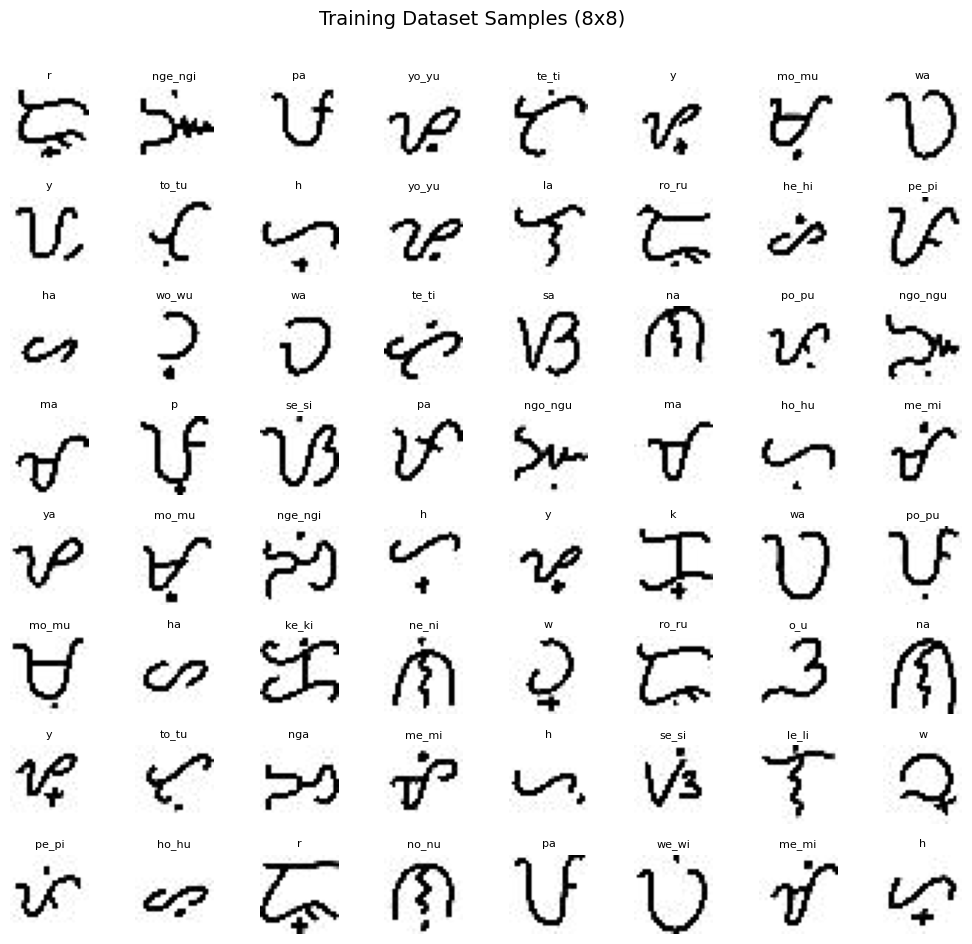

In [28]:
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

# Create a reverse lookup for class indices
labels = {v: k for k, v in train_generator.class_indices.items()}

for i, ax in enumerate(axes.flat):
    # Get a batch from the generator
    batch_images, batch_labels = next(train_generator)
    
    # Pick a random image from the batch
    rand_img_idx = np.random.randint(0, batch_images.shape[0])

    image_disp = batch_images[rand_img_idx].reshape((28, 28))
    label_index = np.argmax(batch_labels[rand_img_idx])
    label = labels[label_index]

    ax.imshow(image_disp, cmap='gray')
    ax.set_title(label, fontsize=8)
    ax.set_axis_off()

fig.suptitle("Training Dataset Samples (8x8)", fontsize=14)
plt.show()


In [ ]:

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax'),
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.optimizer.learning_rate.assign(0.0001)
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 63)             │         8,127 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 428,479 (1.63 MB)

 Trainable params: 428,479 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.0358 - loss: 4.0275 - val_accuracy: 0.0000e+00 - val_loss: 5.9674
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.2167 - loss: 2.9419 - val_accuracy: 0.0107 - val_loss: 8.2688
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.3634 - loss: 2.0800 - val_accuracy: 0.0392 - val_loss: 9.3607
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4519 - loss: 1.7369 - val_accuracy: 0.0392 - val_loss: 10.1786
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5173 - loss: 1.4724 - val_accuracy: 0.0397 - val_loss: 10.5872
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5615 - loss: 1.3172 - val_accuracy: 0.0427 - val_loss: 11.2862
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5980 - loss: 1.1995 - val_accuracy: 0.0422 - val_loss: 12.2054
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6288 - loss: 1.1022 

In [17]:
model.save('letter_recognizer_model.h5')

In [18]:

img_path = 'test letter.png'
img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
labels = list(train_generator.class_indices.keys())
predicted_letter = labels[predicted_class_index]

print(f"Predicted Letter: {predicted_letter}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted Letter: wo_wu


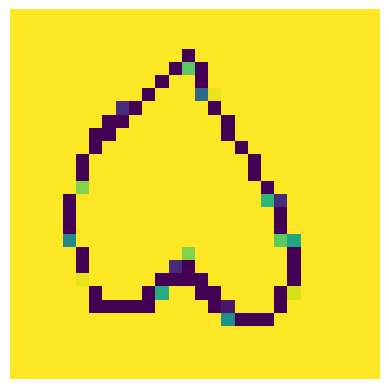

In [19]:
plt.imshow(img)
plt.axis('off')
plt.show()